<a href="https://colab.research.google.com/github/djgnatzy/MakeAIWork2/blob/temp_test/apple_disease_classification_basic_cnn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/data'

/content/drive/.shortcut-targets-by-id/1DQIzo_cjXQXSNKb7CeB7ipGp5aysmbbs/data


In [3]:
# !gdown -- "1DQIzo_cjXQXSNKb7CeB7ipGp5aysmbbs"

In [ ]:
# directory = 'drive/My Drive/data/Train'

# Image classification

## Setup

Import TensorFlow and other necessary libraries:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
keras = tf.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

import random

## Download and explore the dataset

In [5]:
import pathlib
data_dir = '/content/drive/My Drive/data/train'   #'drive/My Drive/data/Train'
data_dir = pathlib.Path(data_dir) 

In [ ]:
# import os

# folder = data_dir #'data/Train/Blotch_Apple/'
# count = 1
# # count increase by 1 in each iteration
# # iterate all files from a directory
# for file_name in os.listdir(folder):
#     # Construct old file name
#     source = folder + file_name

#     # Adding the count to the new file name and extension
#     destination = folder + "blotch_" + str(count) + ".jpg"

#     # Renaming the file
#     os.rename(source, destination)
#     count += 1

# print('All files renamed')

# print('New names are:')
# # verify the result
# result = os.listdir(folder)
# print(result)

After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

380


Here are some roses:

In [7]:
blotches = list(data_dir.glob('Blotch_Apple/*'))
# PIL.Image.open(str(blotches[45]))

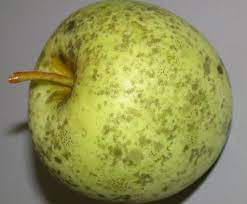

In [ ]:
# PIL.Image.open(str(blotches[23]))

And some scabs:

In [9]:
scabs = list(data_dir.glob('Scab_Apple/*'))
# PIL.Image.open(str(scabs[0]))

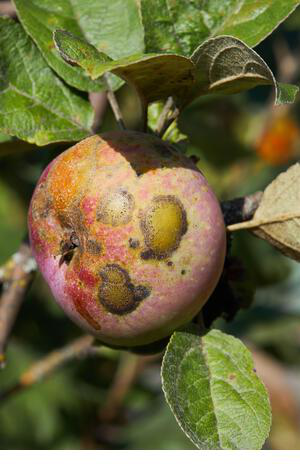

In [ ]:
# PIL.Image.open(str(scabs[48]))

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 240
img_width = 240

In [11]:
data_dir = '/content/drive/MyDrive/data/train'

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 383 files belonging to 4 classes.
Using 307 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 383 files belonging to 4 classes.
Using 76 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


## Visualize the data

Here are the first nine images from the training dataset:

In [ ]:
# plt.figure(figsize=(15, 15))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 240, 240, 3)
(32,)


# Importeer tevens de test data

In [16]:
test_dir = '/content/drive/My Drive/data/test'
test_dir = pathlib.Path(test_dir) 

image_count = len(list(test_dir.glob('*/*.jpg')))
# print(image_count)

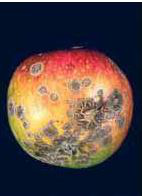

In [ ]:
# blotchez = list(test_dir.glob('Blotch_Apple/*'))
# PIL.Image.open(str(blotchez[4]))

In [17]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [18]:
class_names = test_ds.class_names
# print(class_names)

In [ ]:
# plt.figure(figsize=(15, 15))
# for images, labels in test_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [19]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 240, 240, 3)
(32,)


## Standardize the data

In [20]:
normalization_layer = layers.Rescaling(1./255)

## Basic Keras model


In [21]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model.summary()

In [23]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/15
10/10 [==============================] - 30s 3s/step - loss: 3.0243 - accuracy: 0.2638 - val_loss: 1.3475 - val_accuracy: 0.2105
Epoch 2/15
10/10 [==============================] - 20s 2s/step - loss: 1.2171 - accuracy: 0.5179 - val_loss: 1.1510 - val_accuracy: 0.4605
Epoch 3/15
10/10 [==============================] - 20s 2s/step - loss: 0.8974 - accuracy: 0.6840 - val_loss: 0.8706 - val_accuracy: 0.6184
Epoch 4/15
10/10 [==============================] - 20s 2s/step - loss: 0.6036 - accuracy: 0.7980 - val_loss: 0.9023 - val_accuracy: 0.6053
Epoch 5/15
10/10 [==============================] - 20s 2s/step - loss: 0.4530 - accuracy: 0.8567 - val_loss: 0.8678 - val_accuracy: 0.6842
Epoch 6/15
10/10 [==============================] - 20s 2s/step - loss: 0.3125 - accuracy: 0.9088 - val_loss: 0.7944 - val_accuracy: 0.7237
Epoch 7/15
10/10 [==============================] - 20s 2s/step - loss: 0.2319 - accuracy: 0.9349 - val_loss: 1.0174 - val_accuracy: 0.6974
Epoch 8/15
10/10 [==

In [ ]:
print(len(history.history['loss']))

15


In [ ]:
model.save("models_saved/model_basic_1.h5", overwrite=True, include_optimizer=True)

## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

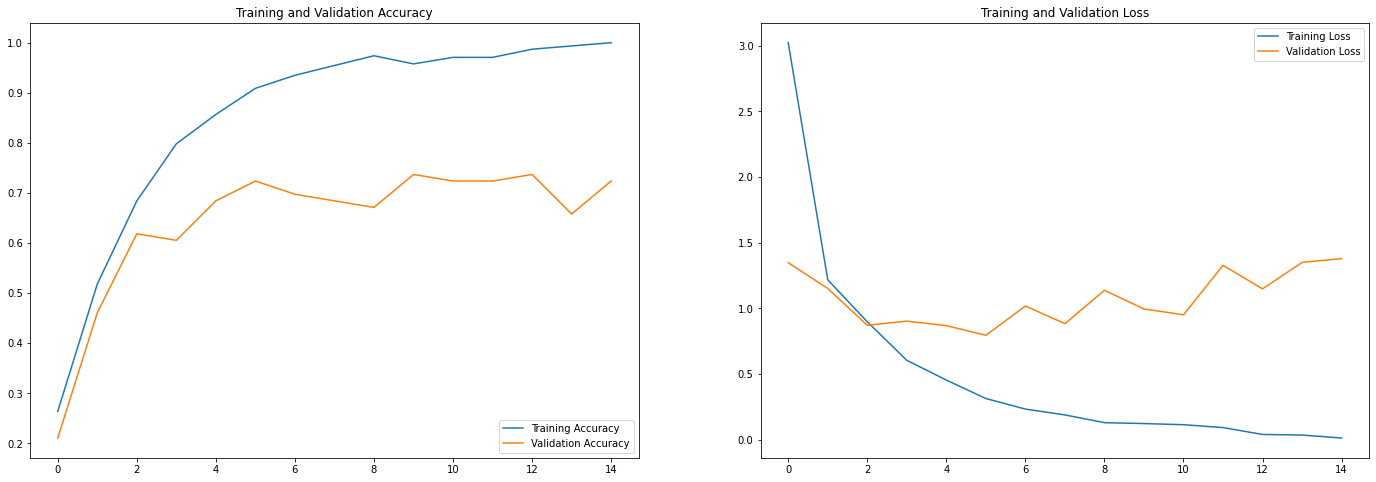

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.savefig('saved_models/model_plots_xx.png') # om op te slaan
plt.show()

In [25]:
model.predict(test_ds)

4/4 [==============================] - 5s 1s/step


array([[-6.86970711e+00,  9.03070641e+00,  1.80456626e+00,
         7.23506451e+00],
       [ 5.62415552e+00, -5.95477045e-01, -5.91244173e+00,
         8.35616684e+00],
       [-6.75371933e+00,  8.62198532e-01,  5.48003960e+00,
        -1.42934561e+00],
       [ 3.78273517e-01,  5.33887100e+00,  9.12837565e-01,
         3.06271887e+00],
       [ 4.83272362e+00, -1.76912136e-02, -3.22453856e+00,
         1.51794529e+00],
       [-7.85610616e-01, -3.33320665e+00,  5.59594679e+00,
         4.90586662e+00],
       [-7.62521553e+00, -2.00040918e-03,  7.56955099e+00,
         8.13457310e-01],
       [-1.08251829e+01,  7.22256565e+00,  1.19669943e+01,
        -4.75645494e+00],
       [ 2.21042633e+00,  4.48161650e+00, -3.61372209e+00,
         5.58309317e+00],
       [ 1.15573816e+01, -1.53926444e+00, -7.46260023e+00,
         7.29893446e+00],
       [-3.58324003e+00, -3.90688807e-01,  5.14345503e+00,
        -1.76876831e+00],
       [ 5.66131973e+00, -6.34000659e-01, -7.17024624e-01,
      

In [26]:
sunflower_url = "https://www.botanicaplantnursery.co.uk/user/products/large/red-devil-apple-400-p.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 501ms/step
This image most likely belongs to Scab_Apple with a 78.51 percent confidence.


4/4 [==============================] - 2s 473ms/step


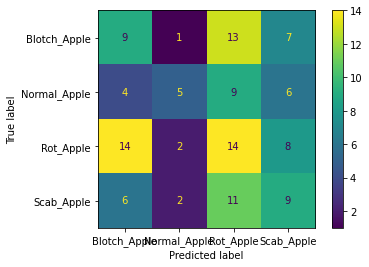

<Figure size 576x576 with 0 Axes>

In [39]:
predictionBatch = model.predict(test_ds)
predictionEnhanced = tf.argmax(predictionBatch, axis=-1)
actualCategories = tf.concat([y for x, y in test_ds], axis=0)

confusionMatrix = metrics.confusion_matrix(actualCategories, predictionEnhanced)

cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["Blotch_Apple", "Normal_Apple", "Rot_Apple", "Scab_Apple"])

cmDisplay.plot()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

# save?
plt.show()